# Forsøksplanlegging eksempel 3: Prosessutvikling

*Eksempelet og dataene er hentet fra Forsøksplanlegging for ingeniørar av John Tyssedahl*

Vi ser på et $2^4$ forsøk med de fire faktorane $A$ = katalysator ladning, $B$ = temperatur, $C$ = trykk og $D$ = konsentrasjon som ble utført i en prosessutviklings-studie. Responsen er prosentvis omdanning. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
run DOEfunksjoner.ipynb 

Faktorkombinasjonene (designmatrisa) for et $2^4$-forsøk er:

In [3]:
X = tofaktorDOE(k=4)
X

,x1,x2,x3,x4
0,-1.0,-1.0,-1.0,-1.0
1,1.0,-1.0,-1.0,-1.0
2,-1.0,1.0,-1.0,-1.0
3,1.0,1.0,-1.0,-1.0
4,-1.0,-1.0,1.0,-1.0
5,1.0,-1.0,1.0,-1.0
6,-1.0,1.0,1.0,-1.0
7,1.0,1.0,1.0,-1.0
8,-1.0,-1.0,-1.0,1.0
9,1.0,-1.0,-1.0,1.0


Listen av faktorkombinasjoner ble randomisert og forsøkene ble gjennomført i denne rekkefølgen: 5, 9, 7, 10, 11, 0, 8, 3, 13, 4, 6, 14, 12, 1, 2 (her har vi forhold oss til Pythons 0-indeksering). 

Resultatene av forsøket, i *sortert* rekkefølge (0-15), er

In [4]:
y = [71, 61, 90, 82, 68, 61, 87, 80, 61, 50, 89, 83, 59, 51, 85, 78]

Vi samler både designmatrisa og tilhørende observerte responsverdier i en matrise:

In [5]:
tab = np.column_stack([X, y])
colnames = ["x1", "x2","x3","x4", "y"]
df = pd.DataFrame(tab,columns=colnames)
df

,x1,x2,x3,x4,y
0,-1.0,-1.0,-1.0,-1.0,71.0
1,1.0,-1.0,-1.0,-1.0,61.0
2,-1.0,1.0,-1.0,-1.0,90.0
3,1.0,1.0,-1.0,-1.0,82.0
4,-1.0,-1.0,1.0,-1.0,68.0
5,1.0,-1.0,1.0,-1.0,61.0
6,-1.0,1.0,1.0,-1.0,87.0
7,1.0,1.0,1.0,-1.0,80.0
8,-1.0,-1.0,-1.0,1.0,61.0
9,1.0,-1.0,-1.0,1.0,50.0


Vi starter med å tilpasse en lineær regresjonsmodell med alle mulige samspillseffekter inkludert i modellen:

In [6]:
modell = smf.ols('y~x1*x2*x3*x4', data=df).fit()
print(modell.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 23 Oct 2023   Prob (F-statistic):                nan
Time:                        11:21:59   Log-Likelihood:                 470.79
No. Observations:                  16   AIC:                            -909.6
Df Residuals:                       0   BIC:                            -897.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      72.2500        inf          0      

/Users/theabj/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/theabj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/theabj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/theabj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/Users/theabj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1512: RuntimeWarning: inva

I modellen over har vi brukt våre 16 observasjoner til å estimere 16 parametere; skjæringspuntet ($\beta_0$), koeffisientene til de fire faktorene $x_1, \ldots, x_4$ ($\beta_1, \ldots, \beta_4$), seks tofaktorinterkasjoner, fire trefaktorinteraksjoner og en firefaktorinteraksjon. Dermed har vi "låst" modellen til de tilgjengelige observasjonene, og vi har ikke noe resterende informasjon i dataene som kan si oss noe om variasjonen rundt regresjonslinja. Vi sier at vi har brukt opp alle frihetsgradene i modelltilpasningen. 

En måte å løse dette på er å gjøre gjentak av forsøket, det vil si 16 nye observasjoner. Men, vi kan også velge å se bort i fra trefaktor- og firefaktor-samspill i modellen med mindre vi har en klar mening om at slike samspill kan være avgjørende. 


In [30]:
modell2 = smf.ols('y~x1+x2+x3+x4+x1*x2+x1*x3+x1*x4+x2*x3+x2*x4+x3*x4', data=df).fit()
print(modell2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     232.9
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           4.95e-06
Time:                        11:51:35   Log-Likelihood:                -14.856
No. Observations:                  16   AIC:                             51.71
Df Residuals:                       5   BIC:                             60.21
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.2500      0.274    263.820      0.0

/Users/theabj/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Nå som vi kun har 11 koeffisienter i modellen har vi 16-11 = 5 "frihetsgrader" tilgjengelig for å estimere variansen. Dermed kan vi også gjennomføre inferens på parametere. Vi ser at alle hovedeffektene er signifikante, i tilegg til interaksjonen $BD$ (x2:x4). Dette ser vi også visualisert i Paretodiagrammet under. Vi kan merke oss at interaksjonen $AC$ er nær å være signifikant. Denne interaksjonen kan vi anbefale å undersøke videre i en ny studie dersom vi tror den er viktig for kostnader e.l.

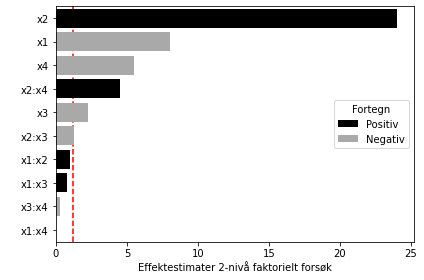

In [31]:
DOEparetoplott(modell2)

I dette eksempelet er det ulike fortegn på faktorene. Vi ser at for å få høyest mulig verdi av responsen må vi ha faktorene $A$ og $D$ (x1 og x4) på lavt nivå, mens faktorene $B$ og $C$ (x2 og x3) må være på høyt nivå. Samspillseffekten $AD$ tilsier at vi får en økning i $Y$ når $A$ og $D$ er på *samme* nivå, slik at $A$ og $D$ (x1 og x4) på lavt nivå vil føre til en positiv samspillseffekt. 